Student Name: Michel Danjou
Student ID: 18263461

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA


As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10


In [3]:
#data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])


The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [4]:
data.shape


(20, 2)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Data:
 [[ 0.          3.22696547]
 [ 1.02083513  3.89450627]
 [ 1.96966455  3.54411353]
 [ 2.94324916  8.91953601]
 [ 4.08720474 19.93661   ]
 [ 4.94613569 22.54828266]
 [ 5.93209169 21.76261123]
 [ 6.86070446 29.99512576]
 [ 8.13342081 34.82264038]
 [ 9.00515948 32.7209472 ]
 [10.00705128 36.46205758]
 [10.80335421 39.62325517]
 [12.26603886 48.67987272]
 [12.68160956 48.97358425]
 [13.92142371 58.29969917]
 [15.3104119  59.85898925]
 [15.98928316 64.31437566]
 [16.98718021 68.36280353]
 [17.96712512 76.08917073]
 [19.1551475  75.02583043]]
(20, 2)
Scikit.pca with nb_components= 2


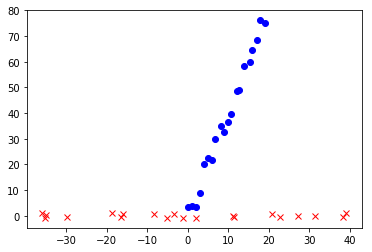

Eigen_values: [6.08553922e+02 4.33452231e-01]
Eigen_vectors: [[ 0.23928616  0.97094909]
 [-0.97094909  0.23928616]]
Transformed_data: [[-3.58932282e+01  9.37847194e-01]
 [-3.50008083e+01  1.06401531e-01]
 [-3.51139801e+01 -8.98707664e-01]
 [-2.96617532e+01 -5.57744559e-01]
 [-1.86910025e+01  9.67766124e-01]
 [-1.59496710e+01  7.58725010e-01]
 [-1.64765924e+01 -3.86588370e-01]
 [-8.26103572e+00  6.81702688e-01]
 [-3.26922139e+00  6.01117334e-01]
 [-5.10126347e+00 -7.48202628e-01]
 [-1.22909690e+00 -8.25792627e-01]
 [ 2.03080928e+00 -8.42531400e-01]
 [ 1.11743240e+01 -9.56005157e-02]
 [ 1.15589433e+01 -4.28817403e-01]
 [ 2.09107964e+01  5.98996389e-01]
 [ 2.27571534e+01 -3.76523893e-01]
 [ 2.72455513e+01  3.04389730e-02]
 [ 3.14151516e+01  3.02644881e-02]
 [ 3.91515480e+01  9.27600595e-01]
 [ 3.84033760e+01 -4.80351266e-01]]
Scikit.pca with nb_components= 1
Eigen_values: [608.55392155]
Eigen_vectors: [[0.23928616 0.97094909]]
Transformed_data: [[-35.89322819]
 [-35.00080834]
 [-35.113980

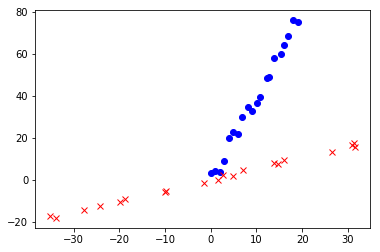

PCA Homebrew nb_components= 1 

mean.col0:9.499354560308918 
mean.col1:37.85304885053951 
eigen_values:
[4.33452231e-01 6.08553922e+02]
eigen_vectors:
[[-0.97094909 -0.23928616]
 [ 0.23928616 -0.97094909]]
filtered_sorted_eigen_values:
[608.55392155]
filtered_sorted_eigen_vectors:
[[ 0.23928616 -0.97094909]]


In [26]:
%reset


import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

        
class Log:
    DEBUG = 1
    INFO = 2
    ALWAYS_SHOW = 3


class My_pca:
    """
    Perform the PCA on a dataset
    
    There is a lot of log statements in this class. I intend to remove
    them in the final code. Leaving them in place for the time being as they
    are useful for debugging. 
    
    BUG ALERT
    =========
    The eigen values calculated by this class match the ones calculated by 
    scikit. 
    
    However, it appears that one of the eigen vectors is the negative version 
    of the one calculted by scikit. Currently investigating the reason behind 
    this.
        
    """

    log_level = Log.INFO
    nb_components = 2
    eigen_values = []
    eigen_vectors = []
    c_matrix = []


    def __init__(self):
        """ init """


    def __log__(self, message, level=Log.INFO):
        """
        Log a message only if its log level is equal or superior to self.log_level
        """
        if level >= self.log_level:
            print(message)

        
    def fit(self, matrix):
        """ 
        Explicitly using array manipulation instead of 
        easier matrix operations 
        """
        self.matrix = matrix
        
        # Calculate mean values of each column from dataset
        m0 = np.mean(self.matrix[:,0])
        m1 = np.mean(self.matrix[:,1])
        self.__log__("mean.col0:{} ".format(m0))
        self.__log__("mean.col1:{} ".format(m1))       
        
        # Center the columns by subtracting the corresponding mean
        c0 = matrix[:,0] - m0
        c1 = matrix[:,1] - m1
        self.__log__("c0       :{} ".format(c0), Log.DEBUG)
        self.__log__("c1       :{} ".format(c1), Log.DEBUG)       
        
        # Create a centered matrix 
        self.c_matrix = []
        self.c_matrix = np.append(c0, c1, axis=1)
        self.__log__("centered_matrix:\n{}".format(self.c_matrix), Log.DEBUG)
        
        # Calculate covariance of centered matrix
        my_cov = np.cov(self.c_matrix, rowvar=False)        
        self.__log__("covariance:\n{}".format(my_cov), Log.DEBUG)
    
        # eigen values, eigen vectors
        eigen_values, eigen_vectors = eig(my_cov)
        self.__log__("eigen_values:\n{}".format(eigen_values), Log.INFO)
        self.__log__("eigen_vectors:\n{}".format(eigen_vectors), Log.INFO)     
        
        # order eigen values and eigen vectors       
        sorted_eigen_values_indexes = eigen_values.argsort()[::-1]
        sorted_eigen_values = eigen_values[sorted_eigen_values_indexes]
        sorted_eigen_vectors = eigen_vectors[sorted_eigen_values_indexes] 
        self.__log__("sorted_eigen_values_indexes:\n{}".format(sorted_eigen_values_indexes), Log.DEBUG)
        self.__log__("sorted_eigen_values:\n{}".format(sorted_eigen_values), Log.DEBUG)
        self.__log__("sorted_eigen_vectors:\n{}".format(sorted_eigen_vectors), Log.DEBUG)

        # use nb_components to decide how many eigen vectors to keep
        filtered_sorted_eigen_values = sorted_eigen_values[:self.nb_components]
        filtered_sorted_eigen_vectors = sorted_eigen_vectors[:self.nb_components] 
        self.__log__("filtered_sorted_eigen_values:\n{}".format(filtered_sorted_eigen_values), Log.INFO)
        self.__log__("filtered_sorted_eigen_vectors:\n{}".format(filtered_sorted_eigen_vectors), Log.INFO)
        
        # save results as class variables
        self.eigen_values = filtered_sorted_eigen_values
        self.eigen_vectors = filtered_sorted_eigen_vectors
            
    
    def transform(self, data):
        """
        Calculate projection of dataset onto the eigen vector basis
        """
        self.fit(data)
        
        self.__log__("eigen_values shape:{}".format(self.eigen_values.shape), Log.DEBUG)
        self.__log__("eigen_values:\n{}".format(self.eigen_values), Log.DEBUG)        
        self.__log__("eigen_vectors shape:\n{}".format(self.eigen_vectors.shape), Log.DEBUG)
        self.__log__("eigen_vectors:\n{}".format(self.eigen_vectors), Log.DEBUG)
        
        self.projection = self.eigen_vectors.T.dot(self.c_matrix.T).T
        
        self.__log__("projected shape :\n{}".format(self.projection.shape), Log.INFO)
        self.__log__("projected  :\n{}".format(self.projection), Log.INFO)
        
        plt.plot(data[:,0], data[:,1], 'bo')
        plt.plot(self.projection[:,0], self.projection[:,1], 'xr')
        plt.show()
        

def build_dataset():
    """
    Create a dataset
    """
    a_x = 0.05
    a_y= 10

    data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

    print("Data:\n", data)
    print(data.shape)
    return data


def scikit_pca( matrix, nb_components):
    """
    Calculate the PCA using Scikit APIs
    """
    print("="*80)
    print("Scikit.pca with nb_components=",nb_components)

    pca = PCA(nb_components)
    pca.fit(matrix)
    projection = pca.transform(matrix)
    
    if nb_components == 2:
        plt.plot(data[:,0], data[:,1], 'bo')
        plt.plot(projection[:,0], projection[:,1], 'xr')
        plt.show()

    print("Eigen_values:", pca.explained_variance_)
    print("Eigen_vectors:", pca.components_)
    print("Transformed_data:", pca.transform(data))
        
    return pca

      
def test():

    my_pca = My_pca()

    # Calculate PCA using scikit, nb_components=2
    pca = scikit_pca(data, 2)

    # Calculate PCA using scikit, nb_components=1
    pca = scikit_pca(data, 1)
    
    # Calculate PCA using homebrew code, nb_components=2
    my_pca.nb_components=2
    print("="*80)
    print("PCA Homebrew nb_components=", my_pca.nb_components, "\n")
    #my_pca.fit(data)
    my_pca.transform(data)
        
    # Calculate PCA using homebrew code, nb_components=1
    my_pca.nb_components=1
    print("="*80)
    print("PCA Homebrew nb_components=", my_pca.nb_components, "\n")
    my_pca.fit(data)
    

data = build_dataset()    
test()

# Comparison between Scikit and homebrew PCA
## Scikit

  * There are 2 eigen values: **580** and **0.45**. 
  * Because the 2nd eigen value is low we can deduct that the second eigen vector will not carry significant information and can be ignored.
  * Looking at the values of the eigen vectors we can clearly see that they are **orthogonal**
  * The first eigen vector is **[-0.24191617 -0.97029715]**

```python
scikit.pca with nb_components=2
eigen_values: [5.80787811e+02 4.56934586e-01]
eigen_vectors: [[-0.24191617 -0.97029715]
 [-0.97029715  0.24191617]]
```
## Homebrew implementation
  * There are 2 eigen values: **580** and **0.45**. 
  * Because the 2nd eigen value is low we can deduct that the second eigen vector will not carry significant information and can be ignored.
  * Looking at the values of the eigen vectors we can clearly see that they are **orthogonal**
  * The first eigen vector is **[ 0.24191617 -0.97029715]**
  
```python
pca homebrew nb_components= 2
eigen_values: [5.80787811e+02 4.56934586e-01]
eigen_vectors: [[ 0.24191617 -0.97029715]
 [-0.97029715 -0.24191617]]
```
`I note sign discrepencies between the eigen vectors returned by Scikit and the Homebrew implementation. The eigen basis is therefore different. I am looking for an explanation.`


Scikit.pca with nb_components= 2


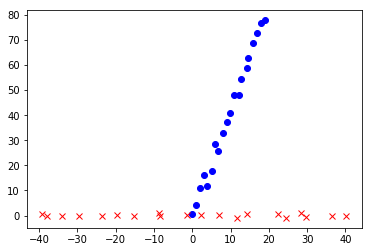

Eigen_values: [6.55465005e+02 3.40778367e-01]
Eigen_vectors: [[-0.22886964 -0.97345708]
 [ 0.97345708 -0.22886964]]
Transformed_data: [[ 40.23990684  -0.27765142]
 [ 36.47156218  -0.14612124]
 [ 29.61280175  -0.73878939]
 [ 24.44331485  -0.94741624]
 [ 28.43889759   1.03706633]
 [ 22.46903783   0.79251609]
 [ 11.70668501  -0.9185991 ]
 [ 14.40814534   0.69593049]
 [  7.00492248   0.23815628]
 [  2.41326044   0.28260869]
 [ -1.25971714   0.14061513]
 [ -8.30519302  -0.38123532]
 [ -8.65932974   0.86044327]
 [-15.10785943  -0.2108334 ]
 [-19.73974722   0.33220961]
 [-23.46261029  -0.21381228]
 [-29.65215097  -0.37066892]
 [-33.9298406   -0.37630409]
 [-37.90230132  -0.32287186]
 [-39.18978455   0.52475736]]

scikit.pca with nb_components=2
eigen_values: [6.55465005e+02 3.40778367e-01]
eigen_vectors: [[-0.22886964 -0.97345708]
 [ 0.97345708 -0.22886964]]
Scikit.pca with nb_components= 1
Eigen_values: [655.46500491]
Eigen_vectors: [[-0.22886964 -0.97345708]]
Transformed_data: [[ 40.2399068

In [23]:
# Calculate PCA using scikit, nb_components=2
pca = scikit_pca(data, 2)
print()
print("scikit.pca with nb_components=2")
print("eigen_values:", pca.explained_variance_)
print("eigen_vectors:", pca.components_)

# Calculate PCA using scikit, nb_components=1
pca = scikit_pca(data, 1)
print()
print("scikit.pca with nb_components=1")
print("eigen_values:", pca.explained_variance_)
print("eigen_vectors:", pca.components_)



# Comparison between nb_component=1 and nb_component=2

Since the value of the second eigen vector low, the second eigen vector can be ignored and thus the resulting eigen space can be simplified to **one dimension**.
